# B-spline registration
Summary from the article High-Performance Deformable Image Registration Algorithms for Manycore Processors [Shackleford, Kandasamy & Sharp 2013-07-29]

## Unimodal B-spline Registration

### Using B-Splines to Represent the Deformation Field (2D)

\begin{equation}
v_x(\vec{x}) = \sum_{i=0}^3 \sum_{j=0}^3 \beta_i(u) \beta_j(v) P_x(l,m)
\end{equation}

\begin{equation}
v_y(\vec{x}) = \sum_{i=0}^3 \sum_{j=0}^3 \beta_i(u) \beta_j(v) P_y(l,m)
\end{equation}

Let $N_x$ and $N_y$ denote the distance between control points in terms of voxels in the x and y directions, respectively. The volume is therefore segemented by the control point grid into many equal-sized tiles, each of dimension $N_x \times N_y$ voxels.

Then, the 2D coordinate of the tile within the voxel $\vec{v}$ falls is given by

\begin{equation}
\lfloor \dfrac{x}{N_x} \rfloor - 1, \lfloor \dfrac{y}{N_y} \rfloor - 1
\end{equation}

and the 16 control points influencing the voxels within the tile are indexed via $l$ and $m$, where

\begin{equation}
l = \lfloor \dfrac{x}{N_x} - 1 + i \rfloor, m = \lfloor \dfrac{y}{N_y} - 1 +j \rfloor
\end{equation}

The local coordinates $(u,v)$ of the voxel within its housing tile are

\begin{equation}
u = \dfrac{x}{N_x} \lfloor \dfrac{x}{N_x} \rfloor, v = \dfrac{y}{N_y} \lfloor \dfrac{y}{N_y}\rfloor
\end{equation}

which are normalized between $[0,1]$. Finally the uniform cubic B-spline basis function $\beta_l$ along the x-direction is given by

\begin{equation}
\beta_i(u) = \begin{cases}
      \dfrac{(1-u)^3}{6} & \text{if  $i = 0$}\\
      \dfrac{3u^3-6u^2+4}{6} & \text{if  $i = 1$}\\
      \dfrac{-3u^3 + 3u^2 + 3u + 1}{6} & \text{if  $i = 2$}\\
      \dfrac{u^3}{6} & \text{if  $i = 3$}\\
    \end{cases}
\end{equation}

and along the y-direction

\begin{equation}
\beta_m(v) = \begin{cases}
      \dfrac{(1-v)^3}{6} & \text{if  $m = 0$}\\
      \dfrac{3v^3-6v^2+4}{6} & \text{if  $m = 1$}\\
      \dfrac{-3v^3 + 3v^2 + 3v + 1}{6} & \text{if  $m = 2$}\\
      \dfrac{v^3}{6} & \text{if  $m = 3$}\\
    \end{cases}
\end{equation}

### Cost Function

\begin{equation}
C = \dfrac{1}{N} \sum_{(x,y)} (S(x,y) - M(x + v_x, y + v_y))^2
\end{equation}

where $N$ denotes the total number of voxels in the moving image $M$ after the applixation of the defomation field $\vec{v}$

### Optimizing the B-Spline Coefficients

\begin{equation}
P_{i+1} = P_{i} - \alpha \dfrac{\partial C}{\partial P_i}, i = 1,2,3 ...
\end{equation}


\begin{equation}
    \dfrac{\partial C}{\partial P_{k, \lambda, \mu}} = \dfrac{1}{N} \sum_{(x,y)} \dfrac{\partial C}{\partial \vec{v}(x,y)} \dfrac{\vec{v}(x,y)}{\partial P}
\end{equation}

\begin{equation}
    \dfrac{\vec{v}(x,y)}{\partial P} = \sum_{l=0}^3 \sum_{m=0}^3 \beta_l(u) \beta_m(v)
\end{equation}

\begin{equation}
    \dfrac{\partial C}{\partial \vec{v}(x,y)} = 2 \times [S(x,y) - M(x+v_x, y+v_y)] \nabla M(x,y)
\end{equation}

In [ ]:
# TODO implementation

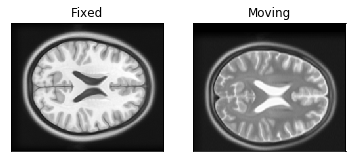

  0 =  499.71906
  1 =  499.71906
  2 =  499.71906
  3 =  499.71906
  4 =  499.71906
  5 =  499.71906
  6 =  499.71906
  7 =  499.71906
  8 =  499.71906
-------
itk::simple::Transform
 BSplineTransform (00000281B1CB9770)
   RTTI typeinfo:   class itk::BSplineTransform<double,2,3>
   Reference Count: 3
   Modified Time: 104314
   Debug: Off
   Object Name: 
   Observers: 
     none
   CoefficientImage: [ 00000281B149F6C0, 00000281B149E100 ]
   TransformDomainOrigin: [-0.625, -0.625]
   TransformDomainPhysicalDimensions: [233.25, 197.25]
   TransformDomainDirection: 1 0
0 1

   GridSize: [11, 11]
   GridOrigin: [-29.7813, -25.2813]
   GridSpacing: [29.1563, 24.6563]
   GridDirection: 1 0
0 1


Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
 Iteration: 9
 Metric value: 499.71906185881863


In [49]:
from __future__ import print_function

import SimpleITK as sitk
import sys
import os
from matplotlib import pyplot as plt
import numpy as np

import nibabel as nib
t1_img = nib.load('mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a.nii')
t2_img = nib.load('mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_nlin_asym_09a/mni_icbm152_t2_tal_nlin_asym_09a.nii')
t1_data = t1_img.get_fdata()[:, :, 94]
t2_data = t2_img.get_fdata()[:, :, 94]
t2_slice_moved = np.zeros(t2_data.shape)
t2_slice_moved[15:, :] = t2_data[:-15, :]
fixed = sitk.GetImageFromArray(arr=t1_data)
moving = sitk.GetImageFromArray(arr=t2_slice_moved)

plt.subplot(121),plt.imshow(t1_data, cmap = 'gray')
plt.title('Fixed'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(t2_slice_moved, cmap = 'gray')
plt.title('Moving'), plt.xticks([]), plt.yticks([])
plt.show()
R = sitk.ImageRegistrationMethod()
R.SetDebug(debugFlag=True)

def command_iteration(method):
    print("{0:3} = {1:10.5f}".format(method.GetOptimizerIteration(), method.GetMetricValue()))

# Transform
transformDomainMeshSize=[8]*moving.GetDimension()
tx = sitk.BSplineTransformInitializer(fixed, transformDomainMeshSize)
R.SetInitialTransform(tx, True)

# Metric
R.SetMetricAsMeanSquares()
# Optimizer
R.SetOptimizerAsGradientDescent(learningRate=1e-8, numberOfIterations=100)
# Interpolator
R.SetInterpolator(sitk.sitkLinear)
R.AddCommand( sitk.sitkIterationEvent, lambda: command_iteration(R) )

outTx = R.Execute(fixed, moving)
print("-------")
print(outTx)
print("Optimizer stop condition: {0}".format(R.GetOptimizerStopConditionDescription()))
print(" Iteration: {0}".format(R.GetOptimizerIteration()))
print(" Metric value: {0}".format(R.GetMetricValue()))

resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(fixed)
resampler.SetInterpolator(sitk.sitkLinear)
resampler.SetDefaultPixelValue(100)
resampler.SetTransform(outTx)

out = resampler.Execute(moving)
simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
cimg = sitk.Compose(simg1, simg2, simg1//2.+simg2//2.)
sitk.Show( cimg, "ImageRegistration1 Composition" )

## Multimodal B-spline Registration

### Introduction
Images from different modalities has different color spaces. Therefore the sum of squared differences between the intensity values of voxels in the reference and the moving images are not recommended. An alternative way is Mutual Information (MI)

1) Generate a deformation field using the B-spline coefficients

2) Applying the deformation field to the moving image

3) Generate voxel-intensity histogram for both the static and deformed moving images as well as their joint histogram

4) Compute the MI using the histogram to assess the registration quality

5) Compute the change in the MI with respect to the B-spline coefficeints

6) Generate a new set of B-spline coeffients.

Repeat until convergence.

### Cost function

To understand $MI$ as a cost function, consider the intensity $a$ of a voxel located at coordinates $\vec{x}$ within the static image, $a = S(\vec{x})$, and the intensity $b$ of a voxel at coordinates $\vec{y}$ within the moving image,  $b = M(\vec{y})$. The goal is to apply a coordinate transform $T(\vec{y})$ to the moving image such that it registers best with the static image. The statistical $MI$ is obtained as 

\begin{equation}
    I = \sum_{a,b} p_j(a,T(b)) ln \dfrac{p_j(a,T(b))}{p_S(a)p_M(T(b))}    
\end{equation}

which depends on the probability distributions of the voxel intensities in the static and moving images. So, we can view $a$ and $b$ as random variables with assiciates probability distribution functions $p_S(a)$ and $p_M(b)$, respectively, and joint probability $p_j(a,b)$. Applying the spatial transformation $T(\vec(y))$ to $M$ modifies $p_j(a,b)$ and this effect is implied using the notation $p_j(a,T(b))$. Furthermore, if $T$ results in veocels being deplaced outside the moving image, $p_M(T(b))$ will change, and if $T$ results in a voxel being remapped to a location that falls between points in the voxel grid, some form of interpolation must be employed to obtain $b$, which will modify $p_M(b)$ as well. These effects are implied using the notation $p_M(T(b))$.

Given that the coordinate transformation $T$ is defined by the deformation field $\vec{v}$ such that $T(b) = M(T(\vec{y}) = M(\vec{x} + \vec{v}) = M(\vec{\Delta})$, an algorithm to compute $MI$ cost function $C$ is best implemented by modifying


\begin{equation}
    I = \sum_{a,b} p_j(a,T(b)) ln \dfrac{p_j(a,T(b))}{p_S(a)p_M(T(b))} = 
    \dfrac{1}{N} \sum_{j=0}^{K_S} \sum_{i=0}^{K_M} h_j(i,j) ln \dfrac{N \times h_j(i,j)}{h_S(j) \times h_M(i)}
\end{equation}

where the probability distribution $p_S(a)$, $p_M(T(b))$, and $p_j(a,T(b))$ are constructed as image histograms $h_s$, $h_M$, and $h_j$ consisting of $K_S$, $K_M$, and $K_S \times K_M$ bins respectively. N is the number of voxels being registered.

### Optimizing the B-Spline Coefficients

Since we have chosen the coordinate transformation $T(\vec{y}) = \vec{x} + \vec{v}$, where $\vec{v}$ is parameterized in terms of the sparse B-spline coefficients $P$, it follows that the MI can be maximized by optimizing these coefficients. We choose to perform this optimization of gradient descent for which an analytic expression for the gradient $\dfrac{\partial C}{\partial \vec{P}}$ is required at every control point P . The expression $\dfrac{\partial C}{\partial \vec{P}}$ can be separated into
partial derivatives using the chain rule:

\begin{equation}
    \dfrac{\partial C}{\partial \vec{P}} = \dfrac{\partial C}{\partial \vec{v}} \times \dfrac{\partial \vec{v}}{\partial \vec{P}}
\end{equation}

where the first term depends on the similarity metric. The second term depends on the parameterixation of the deformation field 
$\vec{v}$ and is easily obtained by taking the derivative with respect to $\vec{P}$ as

\begin{equation}
    \dfrac{\partial \vec{v}}{\partial \vec{P}} = \sum_{l=0}^3 \sum_{m=0}^3 \sum_{n=0}^3 \beta_l(u) \beta_m(u) \beta_n(u)
\end{equation}

In the first term of  $C$ and $\vec{v}$ are coupled through the probability distribution $p_j$ and are therefore directly affected by the interpolation. This becomes clearer when $\partial C / \partial \vec{v}$
is further decomposed as 

\begin{equation}
    \dfrac{\partial C}{\partial \vec{v}} = \dfrac{\partial C}{\partial p_j(a,M(\vec{\Delta}))} \times \dfrac{\partial p_j(a,M(\vec{\Delta})}{\partial \vec{v}} = \sum_{x=0}^7 (\dfrac{\partial C}{\partial p_j(a,M(n_x))} \times \dfrac{\partial M(w_x)}{\partial \vec{v}})
\end{equation}

where $M(\vec{\Delta})$ is the value of the voxel in the moving image that corresponds to the static image voxel $a = S(\vec{x})$. However, since $\vec{\DeltaΔ}$ falls between voxels in the moving image, eight moving-image voxels of varying weightsare taken to correspond to $\vec{x}$ due to the interpolation, resulting in the simplifications. The first term is obtained using the derivative with respect to the joint distribution $p_j$ as

\begin{equation}
    \dfrac{\partial C}{\partial p_j(a,M(n_x))} = ln \dfrac{p_j(a,M(n_x)}{p_S(a)p_M(M(n_x))} - C
\end{equation}

The second term describes how the joint distribution changes with the vector field. Recall that the displacement vector locally transforms the coordinates of the moving image $M$ such that $\vec{\Delta} = \vec{x} + \vec{v}$. As the vector field is modified, the partial volumes, $w_0 - w_7$, are to be inserted into the moving image and joint histograms $h_M$ and $h_j$ will change in size. Therefore, $\partial p_j(a,M(\vec{\Delta})) / \partial \vec{v}$ is determined by changes exhibited is the partial volumes $w_0 - w_7$ as $\vec{\Delta}$ evolves with the governing deformation field $\vec{v}$. These changes is the partial volumes with respect o the deformation field $\partial w_x / \partial \vec{v}$ for $x \in [0,7]$, with respect to each of the Cartesian directions are easily obtained, this resulting in 24 expressions. so, for partial volume $w_0$:

\begin{equation}
    \dfrac{\partial w_0}{\partial v_x} = (-1) \times (1 - {\Delta_y}) \times 1 - {\Delta_z}
\end{equation}

\begin{equation}
    \dfrac{\partial w_0}{\partial v_y} = (-1) \times (1 - {\Delta_x}) \times 1 - {\Delta_z}
\end{equation}

\begin{equation}
    \dfrac{\partial w_0}{\partial v_z} = (-1) \times (1 - {\Delta_x}) \times 1 - {\Delta_y}
\end{equation}

ans similarly for $w_1 - w_7$. Therefore computing $\partial C / \partial v$ at a given voxel $x$ is $S$ involves cycling through the eight bins corresponding to the neighbors described by $\vec{\Delta}$. So, for the first neighbor $n_0$, we determine which bin $B_{M_0}$ within histogram $h_M$ the voxel value $n_0$ belongs. This gives $h_M(B_{M_0})$. Similarly, the bin $B_S$ within the static image histogram $h_s$ associated with the static image voxel $a = S(\vec{x})$ is easily obtained, this giving $h_S(B_S)$. Knowing $B_S$ and $B_{M_0}$ gives the associated joint histogram value $h_j(B_S, B_{M_0})$. Now, $\partial C / \partial p_J$ for neighbor $n_1$ is obtained as 

\begin{equation}
    \dfrac{\partial C}{\partial p_j(a,M(n_0))} = ln \dfrac{h_j(B_S, B_{M_0})}{h_S(B_S)h_M(B_{M_0})} - C
\end{equation}

The contribution of neares neightbor $n_0$ and its associated partial volume $w_0$ on $\partial C / \partial \vec{v}$ is found by first computing $\partial w_0 / \partial \vec{x}$. Each of the three components of $\partial w_0 / \partial \vec{x}$ are weighted and leading to

\begin{equation}
    \dfrac{\partial C}{\partial v_x} = 
    (\dfrac{\partial w_0}{v_x} \times \dfrac{\partial C}{\partial p_j}|_{n_0}) + 
    (\dfrac{\partial w_1}{v_x} \times \dfrac{\partial C}{\partial p_j}|_{n_1}) + 
    ...
\end{equation}

\begin{equation}
    \dfrac{\partial C}{\partial v_y} = 
    (\dfrac{\partial w_0}{v_y} \times \dfrac{\partial C}{\partial p_j}|_{n_0}) + 
    (\dfrac{\partial w_1}{v_y} \times \dfrac{\partial C}{\partial p_j}|_{n_1}) + 
    ...
\end{equation}

\begin{equation}
    \dfrac{\partial C}{\partial v_x} = 
    (\dfrac{\partial w_0}{v_z} \times \dfrac{\partial C}{\partial p_j}|_{n_0}) + 
    (\dfrac{\partial w_1}{v_z} \times \dfrac{\partial C}{\partial p_j}|_{n_1}) + 
    ...
\end{equation}

which gives $\partial C / \partial \vec{v}$ at the static image voxel coordinate $\vec{x}$. This operation is performed for all $N$ voxels in $S$.

In [ ]:
# TODO implementation

## Analytic Vector Field Regularization for B-spline Parameterized Methods

### Theory

Given a three dimension fixed image $F$ with voxel coordinates $\vec{\theta} = x,y.z$ and voxel intensity $f = F(\vec{\theta})$ and moving image $M$ with voxel coordinates $\phi = x_2, y_2, z_2$ and voxel intensity $m = M(\theta)$ representing the same underlaying anatomy as $F$ within the image overlap domain $\vec{\omega}$, the two images $F$ and $M$ are said to be registered when the cost-function

\begin{equation}
    C = \sum_{\vec{T(\omega)} \in \vec{\Omega}} \psi(f,m) + \lambda S
\end{equation}

is optimized according to the similiarity metric $\psi$ under the coordinate mapping $\vec{T(\theta)}=\theta + v$. Here $\vec{v}$  is the dense vector field defined for every voxel $\vec{\theta} \in \vec{\Omega}$, which is assumed to be capable of providing a good one-to-one mapping $F$ to $M$. 

The smoothness $S$ of $\vec{ν}$ is added to $C$ with weight $\lambda$ to drive $\vec{T}$ to a physically meaningful coordinate map. When represented sparsely via the uniform cubic B-spline basis, the vector field $\vec{v}$ is parameterized by the set of B-spline basis coefficients $\vec{P_{i,j,k}} = \vec{p_x},\vec{p_y},\vec{p_z}$ where

\begin{equation}
    \vec{p_x} = \begin{bmatrix}p_{x,0,0,0}\\...\\ p_{x,I,J,K}\end{bmatrix},
    \vec{p_y} = \begin{bmatrix}p_{y,0,0,0}\\...\\ p_{y,I,J,K}\end{bmatrix},
    \vec{p_z} = \begin{bmatrix}p_{z,0,0,0}\\...\\ p_{z,I,J,K}\end{bmatrix}
\end{equation}

are defined for $n = I \times J \times K$ control points with real-world spacing $\vec{r} = r_x, r_y, r_z$. From this new basis, the vector field may be expressed at a point $\vec{\theta}$ with Euclidean coefficients $\vec{v}$ computed via the following tensor product using 64 B-spline coefficients supporting $\vec{\theta}$:

\begin{equation}
    v_x = \sum_{i=0}^3 \sum_{j=0}^3 \sum_{k=0}^3 \vec{p_{i,j,k}} \sum_{a=0}^3 Q_x^{\delta_x}(i,a)\vec{x}(a) \sum_{b=0}^3 Q_y^{\delta_y}(i,b)\vec{y}(b) \sum_{c=0}^3 Q_z^{\delta_z}(i,c)\vec{z}(c) 
\end{equation}

for the x-dimension and similiar for the y- and z- dimensions. Here 

\begin{equation}
    \vec{x} = \begin{bmatrix}1 & x & x^2 & x^3 \end{bmatrix}^T
\end{equation}

forms a Cartesion basis and $\vec{y}$ and $\vec{z}$ are defined similarly. The matrices $Q_x^\delta$, $Q_y^\delta$, $Q_z^\delta$ are defined by

\begin{equation}
    Q_x^\delta = BR_x\Delta^\delta, Q_y^\delta = BR_y\Delta^\delta, Q_z^\delta = BR_z\Delta^\delta
\end{equation}

where $B$ forms the cubic B-spline basis and $R_x$, $R_y$ and $R_z$ confine the evalution of the B-spline basis $\in [0,1]$:

\begin{equation}
    B = \dfrac{1}{6} \begin{bmatrix}1 & -3 & 3 & 1\\4 & 0 & -6 & 3\\1 & 3 & 3 & -3\\0 & 0 & 0 & 0\end{bmatrix},
    R_x = \begin{bmatrix}1 & 0 & 0 & 0\\\ 0 & \dfrac{1}{r_x} & 0 & 0\\0 & 0 & \dfrac{1}{r_x^2} & 0\\0 & 0 & 0 & \dfrac{1}{r_x^3}\end{bmatrix}
\end{equation}

The matrix $\Delta^\delta$ is defined for $\delta \in [0,2]$ as follows:

\begin{equation}
    \Delta^0 = \begin{bmatrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{bmatrix},
    \Delta^1 = \begin{bmatrix}0 & 0 & 0 & 0\\1 & 0 & 0 & 0\\0 & 2 & 0 & 0\\0 & 0 & 3 & 0\end{bmatrix},
    \Delta^2 = \begin{bmatrix}0 & 0 & 0 & 0\\0 & 0 & 0 & 0\\2 & 0 & 0 & 0\\0 & 6 & 0 & 0\end{bmatrix},
\end{equation}

and provides a convenient method for obtaining $v'$ and $v''$ with respect to the Euclidean basis as required by the caclulation of the smoothness penalty:

\begin{equation}
    S = \int_\Omega 
    (\dfrac{\partial^2\vec{v}}{\partial x^2})^2 + 
    (\dfrac{\partial^2\vec{v}}{\partial y^2})^2 + 
    (\dfrac{\partial^2\vec{v}}{\partial z^2})^2 + 
    (\dfrac{\partial^2\vec{v}}{\partial xy})^2 + 
    (\dfrac{\partial^2\vec{v}}{\partial xz})^2 + 
    (\dfrac{\partial^2\vec{v}}{\partial yz})^2
\end{equation}

We may obtain expressions for these derivative terms and expanding the triple summation over $(i,j,k)$ to produce the $64 \times 1$ vector:

\begin{equation}
    \gamma^{\delta_x, \delta_y, \delta_z} = \begin{bmatrix}
    (Q_x^{\delta_x}(0,a) \vec{x}(a)) (Q_y^{\delta_y}(0,b) \vec{y}(b)) (Q_z^{\delta_z}(0,c) \vec{z}(c)) \\
    (Q_x^{\delta_x}(1,a) \vec{x}(a)) (Q_y^{\delta_y}(1,b) \vec{y}(b)) (Q_z^{\delta_z}(1,c) \vec{z}(c)) \\
    ...\\
    (Q_x^{\delta_x}(3,a) \vec{x}(a)) (Q_y^{\delta_y}(3,b) \vec{y}(b)) (Q_z^{\delta_z}(3,c) \vec{z}(c)) \\
    \end{bmatrix}
\end{equation}

leading to the expression 

\begin{equation}
    \Gamma^{\gamma_x, \gamma_y, \gamma_z} = \gamma^{\gamma_x, \gamma_y, \gamma_z} \times \gamma^{\gamma_x, \gamma_y, \gamma_z}
\end{equation}

which allows for the production of the polynomial expressions for the squared secord-order partial derivatives by setting $(\gamma_x,\gamma_y, \gamma_z)$ and operating directly on the control-point coefficients. For example,

\begin{equation}
    (\dfrac{\partial^2 v_x}{\partial x \partial z})^2 = \vec{p_x}^T \Gamma^{(1,0,1)} \vec{p_x}
\end{equation}

and

\begin{equation}
    (\dfrac{\partial^2 v_x}{\partial x^2})^2 = \vec{p_x}^T \Gamma^{(2,0,0)} \vec{p_x}
\end{equation}

We can now devise a single matrix operator for computing the intergral $S$ over ang given region supported by a set of 64 B-spline control points. To later simplify computation, we separate the term $\Gamma$ by B-spline basis orientation such that:

\begin{equation}
    \Gamma^{(\gamma_x,\gamma_y,\gamma_z)} = \Gamma^{(\gamma_x)} \otimes \Gamma^{(\gamma_y)} \otimes \Gamma^{(\gamma_z)}
\end{equation}

By separating the four rows of $Q_x^{(\gamma_x)}$ into unit vectors

\begin{equation}
    Q_x^{(\gamma_x)} = \begin{bmatrix}
    \vec{q}_{x,0}^T \\
    \vec{q}_{x,1}^T \\
    \vec{q}_{x,2}^T \\
    \vec{q}_{x,3}^T \\
    \end{bmatrix} ^{(\gamma_x)}
\end{equation}

we may define the sixteen 4x4 matrices given by $\Xi_{x,a,b}=\vec{q}_{x,a} \otimes \vec{q}_{x,b}$ and construct the 4x4 matrix:

\begin{equation}
    \Gamma_x^{(\gamma_x)} = \Xi_{x,a,b}
\end{equation}

Grouping like-order polynomial terms within $\Xi_{x,a,b}$ yield the column vector:

\begin{equation}
    \sigma_{x,a,b} = \begin{bmatrix}
    \Xi(0,0) \\
    \Xi(0,1) + \Xi(1,0) \\
    \Xi(0,2) + \Xi(1,1) + \Xi(2,0) \\
    \Xi(0,3) + \Xi(1,2) + \Xi(2,1) + \Xi(3,0) \\
    \Xi(1,3) + \Xi(2,2) + \Xi(3,1) \\
    \Xi(2,3) + \Xi(3,2) \\
    \Xi(3,3) \\
    \end{bmatrix} _{x,a,b}
\end{equation}

and by integrating the resulting eight order Cartesian bases over $\vec{r}$

\begin{equation}
    \vec{\psi_x} = \begin{bmatrix}
    r_x & \dfrac{1}{2}r_x^2 & \dfrac{1}{3}r_x^3 & \dfrac{1}{4}r_x^4 & \dfrac{1}{5}r_x^5 & \dfrac{1}{6}r_x^6 & \dfrac{1}{7}r_x^7\\
    \end{bmatrix}^T
\end{equation}

the integral $\Gamma_x^{(\delta_x)}$ over a B-spline region may expressed as a 4x4 matrix of vector products

\begin{equation}
    \Gamma_x^{(\delta_x)} = \int_0^{r_x} \Gamma_x^{(\delta_x)} dx = \sigma_{x,a,b}^T \vec{\psi_x}
\end{equation}

and similarly for $\Gamma_y$ and $\Gamma_z$. This allows for the construction of the six desired composite matrix operators

\begin{equation}
    V^{(\delta_x,\delta_y,\delta_z)} = \begin{cases}
      \Gamma^{\delta_x} \otimes \Gamma^{\delta_y} \otimes \Gamma^{\delta_z} & \text{for  $\delta_x + \delta_y + \delta_z = 1$}\\
      0 & \text{otherwise}
    \end{cases}
\end{equation}

which facilitate the rapid computation of the smoothness metric over a region indexed by $(l,m,n)$ as

\begin{equation}
    S_{l,m,n} = \sum_{(\delta_x,\delta_y,\delta_z)} (
    \vec{p}_x^T V^{(\delta_x,\delta_y,\delta_z)}\vec{p}_x + 
    \vec{p}_y^T V^{(\delta_x,\delta_y,\delta_z)}\vec{p}_y + 
    \vec{p}_z^T V^{(\delta_x,\delta_y,\delta_z)}\vec{p}_z)
\end{equation}

and the derivate with respect to a B-spline control point $P_i,j,k$ is

\begin{equation}
    \dfrac{\partial S_{l,m,n}}{\partial P_{i,j,k}} = \sum_{(\delta_x,\delta_y,\delta_z)}(
    2V^{(\delta_x,\delta_y,\delta_z)}\vec{p}_x + 
    2V^{(\delta_x,\delta_y,\delta_z)}\vec{p}_y + 
    2V^{(\delta_x,\delta_y,\delta_z)}\vec{p}_z) 
\end{equation}

The total penatly $S$ and its gradient are expressible via the summations

\begin{equation}
    S = \sum_{(l,m,n)} S_{l,m,n} \text{ and }
    \dfrac{\partial S}{\partial P_{i,j,k}} = \sum_{l=0}^3 \sum_{m=0}^3 \sum_{n=0}^3 \dfrac{\partial S_{l,m,n}}{\partial P_{i,j,k}}
\end{equation}


In [ ]:
# TODO implementation


## Deformable Registration Using Optical-Flow Methods (Demons)

Optical-flow methods describe the registration problem as a set of flow equations under the assumption that image intensities are constant between views. The most common variant, especially that used in medical applications, is the “demons algorithm,” which combines a stabilized vector-field estimation algorithm with Gaussian regularization.

The algorithm is iterative and alternates between solving the flow equations and regularization. Let us consider two time-lapse images $M$ and $S$, where $M$ denotes the moving image and $S$ the static image. For a given voxel, let $m$ and $s$ be its intensities within $M$ and $S$, respectively. The theoretic basis ofoptical flow follows from an assumption that the intensity of a moving object (from $M$ to $S$) is constant with time, which, for small displacements, gives the optical-flow equation

\begin{equation}
    \vec{v} . \vec{\nabla}s = m - s
\end{equation}

where $\vec{\nabla}s$ denotes the brightness gradient withtin the image $S$. Here, $\vec{v}$ denotes the velocity of the voxel int the $(x,y,z)$ space since the image correspond to two successive time frames; $\vec{v}$ can also be considered as the displacement of the voxel during the time interval between the two image frames.

The goal is to solve the displacement vector $\vec{v}$ for each voxel. Since the equation above is under-constrained, a minimum-norm constraint can be applied to yield a solution for the optical flow. However, the flow will be unstable in regions where the image gradient $\vec{\nabla}s$ is very small, leadning to a very large (even infinite) value for $\vec{v}$. Therefore, to correct this problem, Thirion stabilized the vector-field estimation by underestimating the displacement at locations where the image gradient is small; to compensate for this, Gaussian regularization (or smoothing) is applied to the vector field to fill in those regions that are underestimated.

The following equations are solved for each voxel and make up the overall demion algorithm.

\begin{equation}
    \vec{v_0} = 0
\end{equation}

\begin{equation}
    \vec{v'}_k = \vec{v}_{k-1} + \dfrac{(m-s)\vec{\nabla}s} {(\vec{\nabla}s)^2 + (m-s)^2}
\end{equation}

\begin{equation}
    \vec{v}_k = smooth(\vec{v'}_k)
\end{equation}

During each iteration $k$, the equation obtains a preliminary estimate of the displacement $v'_k$ for each voxel using the spatial gradient of image intensities $\vec{\nabla}s$ and the image intensity difference $m-s$. However, if $(\vec{\nabla}s)^2 + (m-s)^2$ is too small, then the equation is unstable and $v'_k$ is not changed. Next, the displacement field is regularized using a Gaussina smoothing filter, ensuring that displacement estimates diffuse out from regions having string image gradients to region with weak gradients. This optical flow process is repeated for the number of iterations needed for $\vec{v}$ to converge, usually between 50 and 100 iterations.


In [37]:
import SimpleITK as sitk
from __future__ import print_function

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, fixed

def smooth_and_resample(image, shrink_factor, smoothing_sigma):
    """
    Args:
        image: The image we want to resample.
        shrink_factor: A number greater than one, such that the new image's size is original_size/shrink_factor.
        smoothing_sigma: Sigma for Gaussian smoothing, this is in physical (image spacing) units, not pixels.
    Return:
        Image which is a result of smoothing the input and then resampling it using the given sigma and shrink factor.
    """
    smoothed_image = sitk.SmoothingRecursiveGaussian(image, smoothing_sigma)
    
    original_spacing = image.GetSpacing()
    original_size = image.GetSize()
    new_size = [int(sz/float(shrink_factor) + 0.5) for sz in original_size]
    new_spacing = [((original_sz-1)*original_spc)/(new_sz-1) 
                   for original_sz, original_spc, new_sz in zip(original_size, original_spacing, new_size)]
    return sitk.Resample(smoothed_image, new_size, sitk.Transform(), 
                         sitk.sitkLinear, image.GetOrigin(),
                         new_spacing, image.GetDirection(), 0.0, 
                         image.GetPixelID())


    
def multiscale_demons(registration_algorithm,
                      fixed_image, moving_image, initial_transform = None, 
                      shrink_factors=None, smoothing_sigmas=None):
    """
    Run the given registration algorithm in a multiscale fashion. The original scale should not be given as input as the
    original images are implicitly incorporated as the base of the pyramid.
    Args:
        registration_algorithm: Any registration algorithm that has an Execute(fixed_image, moving_image, displacement_field_image)
                                method.
        fixed_image: Resulting transformation maps points from this image's spatial domain to the moving image spatial domain.
        moving_image: Resulting transformation maps points from the fixed_image's spatial domain to this image's spatial domain.
        initial_transform: Any SimpleITK transform, used to initialize the displacement field.
        shrink_factors: Shrink factors relative to the original image's size.
        smoothing_sigmas: Amount of smoothing which is done prior to resmapling the image using the given shrink factor. These
                          are in physical (image spacing) units.
    Returns: 
        SimpleITK.DisplacementFieldTransform
    """
    # Create image pyramid.
    fixed_images = [fixed_image]
    moving_images = [moving_image]
    if shrink_factors:
        for shrink_factor, smoothing_sigma in reversed(list(zip(shrink_factors, smoothing_sigmas))):
            fixed_images.append(smooth_and_resample(fixed_images[0], shrink_factor, smoothing_sigma))
            moving_images.append(smooth_and_resample(moving_images[0], shrink_factor, smoothing_sigma))
    
    # Create initial displacement field at lowest resolution. 
    # Currently, the pixel type is required to be sitkVectorFloat64 because of a constraint imposed by the Demons filters.
    if initial_transform:
        initial_displacement_field = sitk.TransformToDisplacementField(initial_transform, 
                                                                       sitk.sitkVectorFloat64,
                                                                       fixed_images[-1].GetSize(),
                                                                       fixed_images[-1].GetOrigin(),
                                                                       fixed_images[-1].GetSpacing(),
                                                                       fixed_images[-1].GetDirection())
    else:
        initial_displacement_field = sitk.Image(fixed_images[-1].GetWidth(), 
                                                fixed_images[-1].GetHeight(),
                                                fixed_images[-1].GetDepth(),
                                                sitk.sitkVectorFloat64)
        initial_displacement_field.CopyInformation(fixed_images[-1])
 
    # Run the registration.            
    initial_displacement_field = registration_algorithm.Execute(fixed_images[-1], 
                                                                moving_images[-1], 
                                                                initial_displacement_field)
    # Start at the top of the pyramid and work our way down.    
    for f_image, m_image in reversed(list(zip(fixed_images[0:-1], moving_images[0:-1]))):
            initial_displacement_field = sitk.Resample (initial_displacement_field, f_image)
            initial_displacement_field = registration_algorithm.Execute(f_image, m_image, initial_displacement_field)
    return sitk.DisplacementFieldTransform(initial_displacement_field)

In [ ]:
# Define a simple callback which allows us to monitor the Demons filter's progress.
def iteration_callback(filter):
    print('\r{0}: {1:.2f}'.format(filter.GetElapsedIterations(), filter.GetMetric()), end='')

fixed_image_index = 0
moving_image_index = 7

# Select a Demons filter and configure it.
demons_filter =  sitk.FastSymmetricForcesDemonsRegistrationFilter()
demons_filter.SetNumberOfIterations(20)
# Regularization (update field - viscous, total field - elastic).
demons_filter.SetSmoothDisplacementField(True)
demons_filter.SetStandardDeviations(2.0)

# Add our simple callback to the registration filter.
demons_filter.AddCommand(sitk.sitkIterationEvent, lambda: iteration_callback(demons_filter))

# Run the registration.
tx = multiscale_demons(registration_algorithm=demons_filter, 
                       fixed_image = images[fixed_image_index], 
                       moving_image = images[moving_image_index],
                       shrink_factors = [4,2],
                       smoothing_sigmas = [8,4])

# Compare the initial and final TREs.
initial_errors_mean, initial_errors_std, _, initial_errors_max, initial_errors = ru.registration_errors(sitk.Euler3DTransform(), points[fixed_image_index], points[moving_image_index])
final_errors_mean, final_errors_std, _, final_errors_max, final_errors = ru.registration_errors(tx, points[fixed_image_index], points[moving_image_index])

plt.hist(initial_errors, bins=20, alpha=0.5, label='before registration', color='blue')
plt.hist(final_errors, bins=20, alpha=0.5, label='after registration', color='green')
plt.legend()
plt.title('TRE histogram');
print('\nInitial alignment errors in millimeters, mean(std): {:.2f}({:.2f}), max: {:.2f}'.format(initial_errors_mean, initial_errors_std, initial_errors_max))
print('Final alignment errors in millimeters, mean(std): {:.2f}({:.2f}), max: {:.2f}'.format(final_errors_mean, final_errors_std, final_errors_max))